## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import datetime as dt
import os 
from time import time


warnings.filterwarnings("ignore")
sns.set(color_codes = True)
sns.set_palette(palette = "magma",n_colors = 8)

## importing dataset

In [2]:
data = pd.read_csv("internet_session.csv")
data


,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout
...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04 01:11:34,00:06:54:32,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout
4708,user9,2022-11-04 10:26:09,00:00:23:49,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout
4709,user9,2022-11-04 20:41:42,00:01:24:13,10.55.15.186,DA:2F:97:0E:B7:D0,18995.2,373657.6,392652.80,Idle-Timeout
4710,user9,2022-11-05 00:21:06,00:08:49:43,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.4,640368.64,Idle-Timeout


## checking dataset

In [3]:
data.shape

(4712, 9)

In [4]:
data.columns


Index(['name', 'start_time', 'usage_time', 'IP', 'MAC', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [5]:
data.dtypes

name                      object
start_time                object
usage_time                object
IP                        object
MAC                       object
upload                    object
download                  object
total_transfer           float64
seession_break_reason     object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4712 non-null   object 
 1   start_time             4712 non-null   object 
 2   usage_time             4712 non-null   object 
 3   IP                     4712 non-null   object 
 4   MAC                    4712 non-null   object 
 5   upload                 4712 non-null   object 
 6   download               4712 non-null   object 
 7   total_transfer         4712 non-null   float64
 8   seession_break_reason  4703 non-null   object 
dtypes: float64(1), object(8)
memory usage: 331.4+ KB


In [7]:
#converting start time column to datetime datatype
data["start_time"] = pd.to_datetime(data["start_time"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4712 non-null   object        
 1   start_time             4712 non-null   datetime64[ns]
 2   usage_time             4712 non-null   object        
 3   IP                     4712 non-null   object        
 4   MAC                    4712 non-null   object        
 5   upload                 4712 non-null   object        
 6   download               4712 non-null   object        
 7   total_transfer         4712 non-null   float64       
 8   seession_break_reason  4703 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 331.4+ KB


In [8]:
#adding a new month column from the start time
data["month"] = data["start_time"].dt.month_name()
data

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason,month
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,May
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,May
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout,May
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout,May
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout,May
...,...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04 01:11:34,00:06:54:32,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout,November
4708,user9,2022-11-04 10:26:09,00:00:23:49,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout,November
4709,user9,2022-11-04 20:41:42,00:01:24:13,10.55.15.186,DA:2F:97:0E:B7:D0,18995.2,373657.6,392652.80,Idle-Timeout,November
4710,user9,2022-11-05 00:21:06,00:08:49:43,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.4,640368.64,Idle-Timeout,November


In [9]:
#adding year column
data["year"] = data["start_time"].dt.year
data


,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason,month,year
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,May,2022
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,May,2022
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout,May,2022
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout,May,2022
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout,May,2022
...,...,...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04 01:11:34,00:06:54:32,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout,November,2022
4708,user9,2022-11-04 10:26:09,00:00:23:49,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout,November,2022
4709,user9,2022-11-04 20:41:42,00:01:24:13,10.55.15.186,DA:2F:97:0E:B7:D0,18995.2,373657.6,392652.80,Idle-Timeout,November,2022
4710,user9,2022-11-05 00:21:06,00:08:49:43,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.4,640368.64,Idle-Timeout,November,2022


In [10]:
#adding day column
data["Day"] =  data["start_time"].dt.day_name()
data

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason,month,year,Day
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,May,2022,Tuesday
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,May,2022,Tuesday
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout,May,2022,Tuesday
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout,May,2022,Wednesday
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout,May,2022,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04 01:11:34,00:06:54:32,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout,November,2022,Friday
4708,user9,2022-11-04 10:26:09,00:00:23:49,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout,November,2022,Friday
4709,user9,2022-11-04 20:41:42,00:01:24:13,10.55.15.186,DA:2F:97:0E:B7:D0,18995.2,373657.6,392652.80,Idle-Timeout,November,2022,Friday
4710,user9,2022-11-05 00:21:06,00:08:49:43,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.4,640368.64,Idle-Timeout,November,2022,Saturday


In [11]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4712 non-null   object        
 1   start_time             4712 non-null   datetime64[ns]
 2   usage_time             4712 non-null   object        
 3   IP                     4712 non-null   object        
 4   MAC                    4712 non-null   object        
 5   upload                 4712 non-null   object        
 6   download               4712 non-null   object        
 7   total_transfer         4712 non-null   float64       
 8   seession_break_reason  4703 non-null   object        
 9   month                  4712 non-null   object        
 10  year                   4712 non-null   int64         
 11  Day                    4712 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory u

In [12]:
#checking for null values
data.isnull().sum()

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
month                    0
year                     0
Day                      0
dtype: int64

In [13]:
#droppping null values
data.dropna(inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4703 entries, 0 to 4710
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4703 non-null   object        
 1   start_time             4703 non-null   datetime64[ns]
 2   usage_time             4703 non-null   object        
 3   IP                     4703 non-null   object        
 4   MAC                    4703 non-null   object        
 5   upload                 4703 non-null   object        
 6   download               4703 non-null   object        
 7   total_transfer         4703 non-null   float64       
 8   seession_break_reason  4703 non-null   object        
 9   month                  4703 non-null   object        
 10  year                   4703 non-null   int64         
 11  Day                    4703 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory u

In [15]:
#dropping row index 1641,because of its values
Data = data.drop(data.index[1641])
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 0 to 4710
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4702 non-null   object        
 1   start_time             4702 non-null   datetime64[ns]
 2   usage_time             4702 non-null   object        
 3   IP                     4702 non-null   object        
 4   MAC                    4702 non-null   object        
 5   upload                 4702 non-null   object        
 6   download               4702 non-null   object        
 7   total_transfer         4702 non-null   float64       
 8   seession_break_reason  4702 non-null   object        
 9   month                  4702 non-null   object        
 10  year                   4702 non-null   int64         
 11  Day                    4702 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory u

In [16]:
#dropping row index 1648
Data.drop(Data.index[1648], inplace =True)
#converting upload and download column to float datatype
Data["upload"] = Data["upload"].astype(float)
Data["download"] = Data["download"].astype(float)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4710
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4701 non-null   object        
 1   start_time             4701 non-null   datetime64[ns]
 2   usage_time             4701 non-null   object        
 3   IP                     4701 non-null   object        
 4   MAC                    4701 non-null   object        
 5   upload                 4701 non-null   float64       
 6   download               4701 non-null   float64       
 7   total_transfer         4701 non-null   float64       
 8   seession_break_reason  4701 non-null   object        
 9   month                  4701 non-null   object        
 10  year                   4701 non-null   int64         
 11  Day                    4701 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory u

In [17]:
Data["year"] = Data["year"].astype(str)

In [18]:
Data.dtypes

name                             object
start_time               datetime64[ns]
usage_time                       object
IP                               object
MAC                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
month                            object
year                             object
Day                              object
dtype: object

In [19]:
Data.describe(exclude="number").T

,count,unique,top,freq,first,last
name,4701,9,user4,724,NaT,NaT
start_time,4701,4027,2022-05-10 02:59:32,2,2022-05-09 22:52:41,2022-11-05 18:41:14
usage_time,4701,3550,00:00:25:14,7,NaT,NaT
IP,4701,1299,10.55.0.89,80,NaT,NaT
MAC,4701,33,48:E7:DA:58:22:E9,1235,NaT,NaT
seession_break_reason,4701,5,Idle-Timeout,4348,NaT,NaT
month,4701,7,June,1121,NaT,NaT
year,4701,1,2022,4701,NaT,NaT
Day,4701,7,Tuesday,740,NaT,NaT


In [20]:
#Describing float and numeric datatype columns
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
upload,4701.0,33801.714769,94950.120587,2.94,6103.04,15339.52,33996.80,2841640.96
download,4701.0,396833.564488,965948.651716,9.60,52080.64,178268.16,459366.40,27902607.36
total_transfer,4701.0,430620.333531,996257.149114,15.25,61890.56,202905.60,499640.32,28552724.48


In [21]:
corr=Data.corr()
corr

,upload,download,total_transfer
upload,1.000000,0.275591,0.362542
download,0.275591,1.000000,0.995790
total_transfer,0.362542,0.995790,1.000000


<AxesSubplot:>

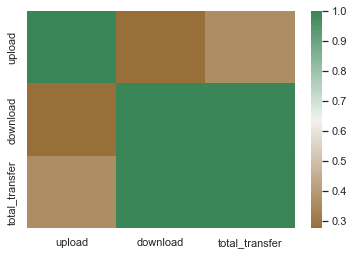

In [22]:
#visualizing correlation
sns.heatmap(corr,cmap=sns.diverging_palette(50,500,n=500))

## data visualization

Text(0.5, 1.0, 'Usage per Day')

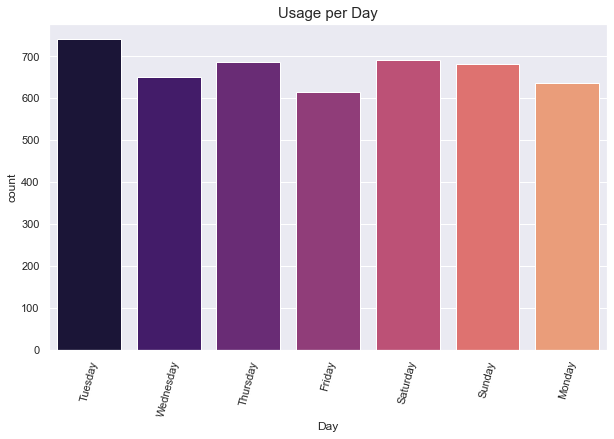

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(Data["Day"])
plt.xticks(rotation=75)
plt.title("Usage per Day",fontsize=15)

Tuesday,Thursday and Saturday had the highest percentage of internet usage almost 90%,while friday has the least percentage of internet usage

Text(0.5, 1.0, 'Usage per Month')

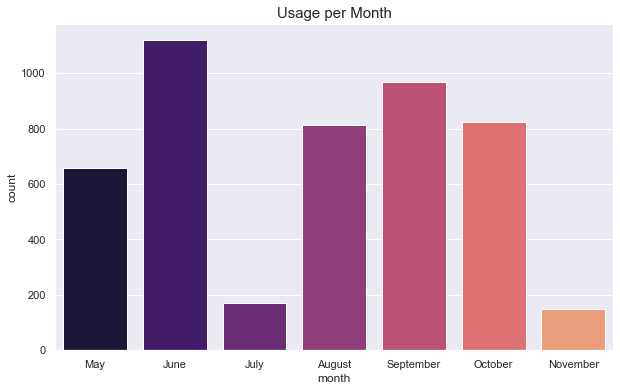

In [24]:

plt.figure(figsize=(10,6))
sns.countplot(Data["month"])
plt.title("Usage per Month",fontsize=15)

June had the highest number  of internet usage more than 90% while July followed by november had the lowest about 15%

Text(0.5, 1.0, 'Break reason')

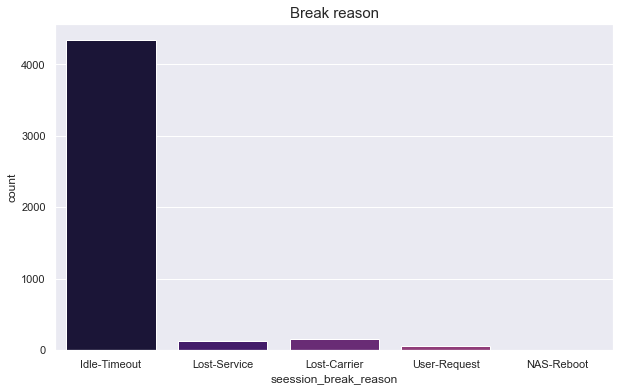

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(Data["seession_break_reason"])
plt.title("Break reason",fontsize=15)

idle timeout was the most frequent cause of sessions breaks,followed by lost service

## Bivariate Analysis

Text(0.5, 1.0, 'Uploads vs users')

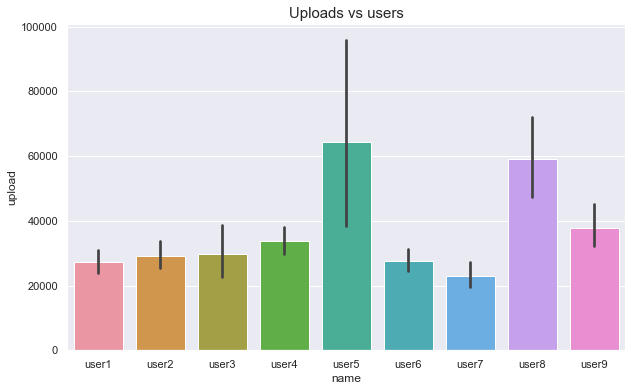

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=Data["name"],y=Data["upload"])
plt.title("Uploads vs users",fontsize=15)

user 5 ,had the most uploads,whiole user 1 had the least

Text(0.5, 1.0, 'Days vs downloads')

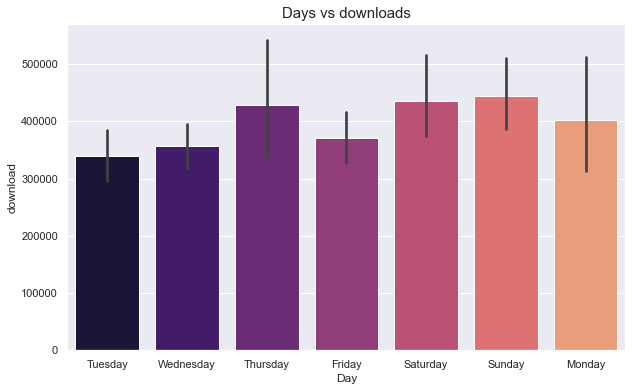

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=Data["Day"],y=Data["download"])
plt.title("Days vs downloads",fontsize=15)

Thursday had the most downloads while tuesday had the least

Text(0.5, 1.0, 'Uploads vs Day')

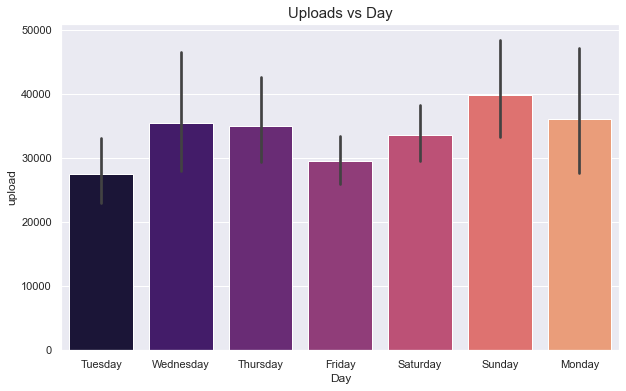

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=Data["Day"],y=Data["upload"])
plt.title("Uploads vs Day",fontsize=15)

Text(0.5, 1.0, 'Day vs total transfers')

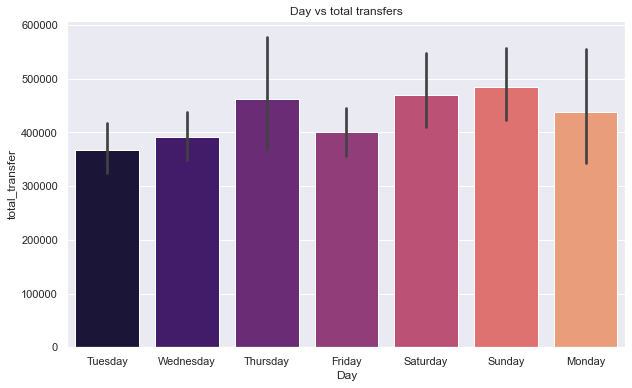

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=Data["Day"],y=Data["total_transfer"])
plt.title("Day vs total transfers")

Tuesday had the least uploads and total transfers

In the above,tuesday had the most percentage of internet usage while it had the least uploads,downloads and file transfers

Text(0.5, 1.0, 'Upload vs dowload linechart')

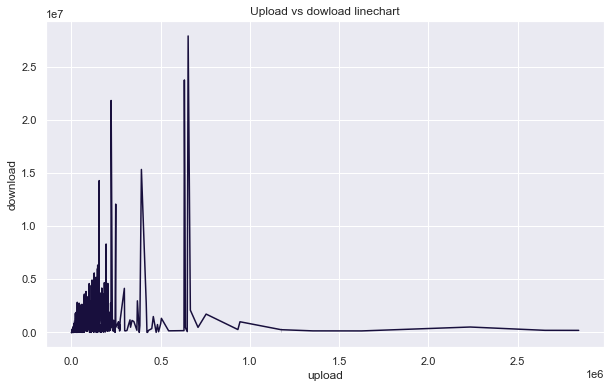

In [48]:
plt.figure(figsize=(10,6))
sns.lineplot(x=Data["upload"],y=Data["download"])
plt.title("Upload vs dowload linechart")

<AxesSubplot:xlabel='total_transfer', ylabel='download'>

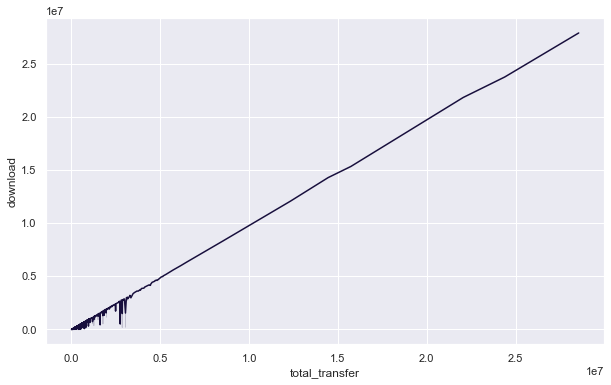

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(x=Data["total_transfer"],y=Data["download"])

<AxesSubplot:xlabel='total_transfer', ylabel='upload'>

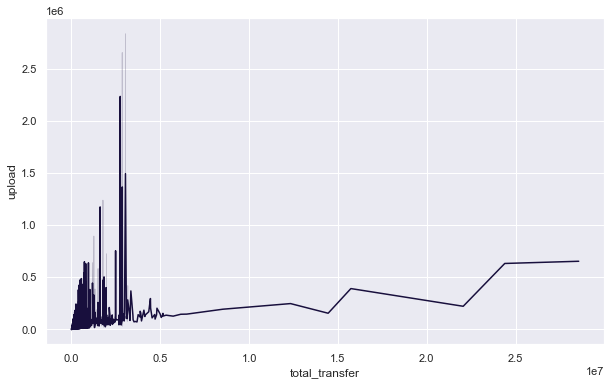

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(x=Data["total_transfer"],y=Data["upload"])